## Federal University of Bahia (UFBA)

### Department of Electrical and Computer Engineering

### Course: PPGEE0023 - Attribute Extraction

### Professor: Eduardo Simas

### Students: Gabriel Correia and Márcio Barros

---


## Code for the Spectrogram of a Varying Square Signal Taken from SciPy:

Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ShortTimeFFT.spectrogram.html

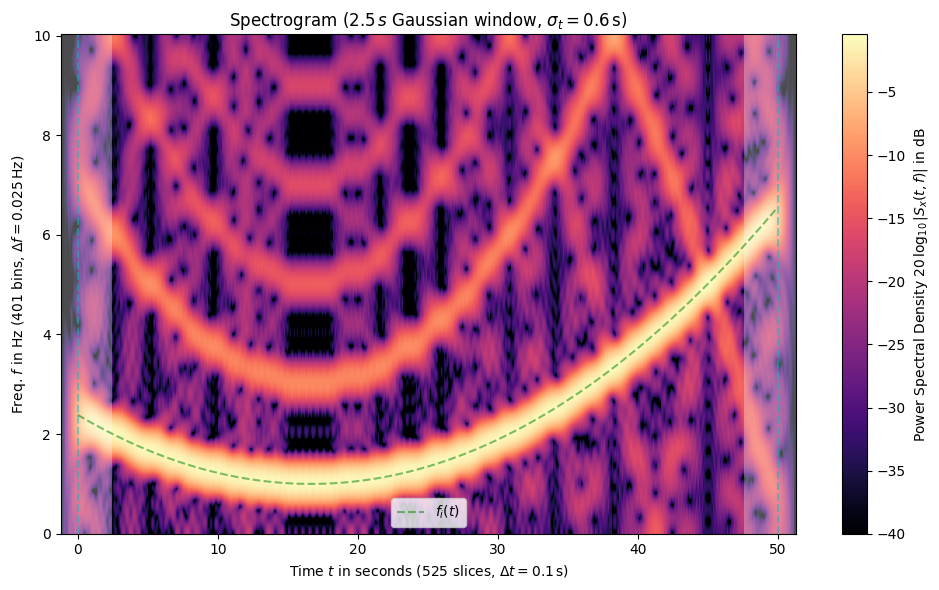

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # Library for plotting graphs
import numpy as np  # Library for numerical operations
from scipy.signal import square, ShortTimeFFT  # Signal processing functions
from scipy.signal.windows import gaussian  # Function to create a Gaussian window

# Set the sampling period and number of samples
N = 1000  # 20 Hz sampling rate for a total of 50 seconds of signal
T_x = 1 / 20  # 20 Hz sampling rate for a total of 50 seconds of signal
t_x = np.arange(N) * T_x  # Create time indexes for the signal

# Generate a varying frequency over time
f_i = 5e-3*(t_x - t_x[N // 3])**2 + 1  # Frequency varies quadratically with time

# Create a square wave signal using the varying frequency
x = square(2 * np.pi * np.cumsum(f_i) * T_x)  # Signal based on the cumulative sum of frequencies

# Define the standard deviation for the Gaussian window
g_std = 12  # Standard deviation for Gaussian window in terms of samples

# Create a symmetric Gaussian window
win = gaussian(50, std=g_std, sym=True)  # Generate a Gaussian window of size 50 samples

# Set up the Short-Time Fourier Transform (STFT) parameters
SFT = ShortTimeFFT(win, hop=2, fs=1/T_x, mfft=800, scale_to='psd')  # Configure STFT with hop size, sample rate, etc.

# Calculate the spectrogram using the STFT (absolute square of STFT)
Sx2 = SFT.spectrogram(x)

# Create a figure and axis for plotting
fig1, ax1 = plt.subplots(figsize=(10, 6))  # Create a larger plot (6x4 inches)

# Get the time range of the plot based on STFT
t_lo, t_hi = SFT.extent(N)[:2]  # Get the lower and upper time limits for the spectrogram

# Set the title and labels for the plot
ax1.set_title(rf"Spectrogram ({SFT.m_num*SFT.T:g}$\,s$ Gaussian " +
              rf"window, $\sigma_t={g_std*SFT.T:g}\,$s)")  # Title with Gaussian window info
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",  # X-axis label with time and slice info
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",  # Y-axis label with frequency bin info
        xlim=(t_lo, t_hi))  # Set x-axis limits to the time range

# Convert the spectrogram data to decibels (dB) for better visualization
Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # Ensure values do not fall below -40 dB

# Plot the spectrogram as an image on the plot
im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='magma')  # Plot spectrogram with 'magma' colormap

# Plot the varying frequency over time as a green dashed line
ax1.plot(t_x, f_i, 'g--', alpha=.5, label='$f_i(t)$')  # Plot the frequency variation

# Add a colorbar to show the power spectral density scale in dB
fig1.colorbar(im1, label='Power Spectral Density ' +
                         r"$20\,\log_{10}|S_x(t, f)|$ in dB")

# Shade areas where the window slices extend beyond the signal
for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.3)  # Mark regions outside the main signal

# Mark the borders of the signal with vertical dashed lines
for t_ in [0, N * SFT.T]:  # For the start and end of the signal
    ax1.axvline(t_, color='c', linestyle='--', alpha=0.5)  # Add cyan dashed lines

# Add a legend to the plot
ax1.legend()

# Adjust the layout of the plot to ensure everything fits well
fig1.tight_layout()

# Display the plot
plt.show()


The provided code is an example of signal analysis using Python, focusing on generating a spectrogram of a square wave signal with a varying frequency over time. It begins by importing the necessary libraries, such as matplotlib.pyplot, which is used for creating graphs and visualizations; numpy, which offers functions for efficient numerical operations; and scipy.signal, which contains functions for signal processing.

Next, the sampling parameters are configured. The total number of samples is set to 1000, and the sampling period is established to correspond to a rate of 20 Hz, resulting in a total time of 50 seconds for the signal. The code creates an array of time indices based on the number of samples and the sampling period. After that, a frequency that varies quadratically over time is calculated, starting at 1 Hz and increasing as time progresses.

With the frequency defined, the code generates a square wave signal based on the cumulative sum of the varying frequencies, resulting in a signal that oscillates between -1 and 1. To apply the Fourier analysis, a Gaussian window is defined, which influences the smoothing of the spectrum. This window is created with a specific standard deviation, and then the Short-Time Fourier Transform (STFT) is configured, determining the window size, hop size, and sampling rate.

The spectrogram of the signal is calculated from the STFT, which represents the signal's intensity as a function of time and frequency. For visualization, a new figure and axes are created, and the time axis limits are obtained from the spectrogram. The title of the graph and the labels of the axes are defined, including information about the number of segments and the temporal and frequency resolution.

The data from the spectrogram are then converted to decibels, facilitating visualization by avoiding values below -40 dB. The spectrogram is plotted as an image, using a color scheme called 'magma', and the varying frequency over time is represented by a green dashed line. Additionally, a color bar is added to the graph to show the scale of power spectral density in decibels.

Areas where the analysis window extends beyond the main signal are shaded, and dashed vertical lines mark the beginning and end of the signal. Finally, a legend is added to the plot, the layout is adjusted to ensure that all elements fit well, and the graph is displayed to the user. Thus, the code provides a detailed visualization of the signal's evolution in terms of its frequency components.

---